Hello...
use_gpu = 0

numpy int32 (4 bytes)
resolution = 1_024, array size = 1_048_576, size = 4_194_304, size_m = 4.2 Mb, natural size = 4.2 MB
resolution = 2_048, array size = 4_194_304, size = 16_777_216, size_m = 16.8 Mb, natural size = 16.8 MB
resolution = 4_096, array size = 16_777_216, size = 67_108_864, size_m = 67.1 Mb, natural size = 67.1 MB
resolution = 8_192, array size = 67_108_864, size = 268_435_456, size_m = 268.4 Mb, natural size = 268.4 MB
resolution = 16_384, array size = 268_435_456, size = 1_073_741_824, size_m = 1_073.7 Mb, natural size = 1.1 GB
resolution = 32_768, array size = 1_073_741_824, size = 4_294_967_296, size_m = 4_295.0 Mb, natural size = 4.3 GB
resolution = 65_536, array size = 4_294_967_296, size = 17_179_869_184, size_m = 17_179.9 Mb, natural size = 17.2 GB
Unable to allocate 64.0 GiB for an array with shape (131072, 131072) and data type int32

numpy float64 (8 bytes)
resolution = 1_024, array size = 1_048_576, size = 8_388_608, size_m = 8.4 Mb, na

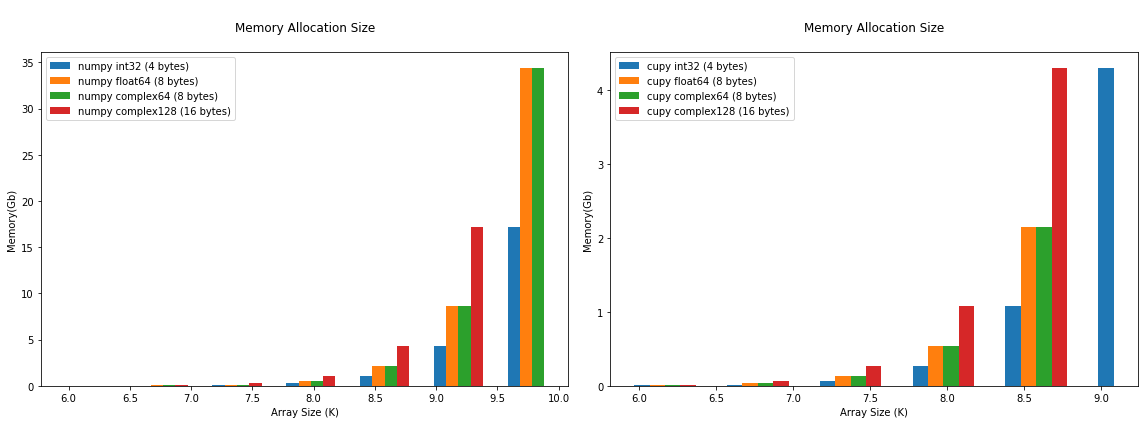

Done.


In [77]:
import numpy 
import cupy
import math
from sys import getsizeof
from humanize import naturalsize
from matplotlib import pyplot as plt

print( "Hello..." )

debug = 1
row_cnt = 1; col_cnt = 2
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 6*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 

use_gpus = [ 0, 1 ]

for idx, use_gpu in enumerate( use_gpus ) : 
    chart = charts[ chart_idx ]; chart_idx +=1 

    print( f"use_gpu = {use_gpu}" )
    print( flush=1 )

    np = cupy if use_gpu else numpy

    data_types = [ np.int_, np.double, np.csingle, np.cdouble ]
    #data_types = [ np.int_, ][::-1]
    
    dx = 0
    bar_count = 0 

    for data_type in data_types :
        array = np.array( 1, data_type )
        data_type_size = array.nbytes
        
        type_str = f"{data_type}".split( " " )[-1].split(".")[-1].split( "'")[0]
        type_str = [ "numpy ", "cupy "][use_gpu] + type_str
        type_str = f"{type_str } ({data_type_size} bytes)"
        
        print( type_str, flush=1 )
        
        resolutions = []
        memories = []
        label = type_str
        
        res = 9
        no_error = True 
        
        while no_error  : 
            array = None
            try : 
                res += 1
                resolution = 2**res 
                array = np.zeros( (resolution, resolution ), data_type )
                size = array.nbytes
                size_m = size / 10**6 
                debug and print( f"resolution = {resolution:_}, array size = {resolution**2:_}, size = {size:_}, size_m = {size_m:_.1f} Mb, natural size = {naturalsize(size)}", flush=1 )
                
                resolutions.append( resolution**2 )
                memories.append( size )
            except Exception as e:
                no_error = False 
                print( e, flush=1 )
            finally :
                del array
            pass
        pass
        
        #x =  resolutions
        x = numpy.log10( numpy.array( resolutions ) )
        y = numpy.array( memories )/10**9
        
        chart.bar( x + dx, y, label=label, width=0.1 ) 
        dx += 0.1
    
        print( )
    pass

    chart.set_title( "\nMemory Allocation Size\n" )
    chart.set_xlabel( "Array Size (K)" )
    chart.set_ylabel( "Memory(Gb)" )
    chart.legend() 
pass

plt.tight_layout(); plt.show()

print( "Done." )